Decision Tree  

분류와 회귀 분석 모두 사용되어 CART(Classification and Regression Tree) 라고함 

CART 일종의 알고리즘 방식으로도 쓰이는데 이진분리를 함, C4.5 & C5.0 이런것들 모두 알고리즘 방식의 이름이며 CART 랑은 다르게 다지분리(다양
하게 분기되는) 등이 특징 

=> 어차피 오버피팅 잘나서 ensemble 모델 씀
 
분류 Decision tree Classification

tree 모양으로 if else 식으로 분류됨 

분류시 : 숫자만 분류가능 => LabelEncoder, onehotEncoder 로 string형 범주형 변수 변환한뒤 수행

최상위 노드 = 루트 노드(root node) / 자식 노드가 없는 노드를 leaf 노드 / leaf노드가 아닌 누군가의 부모가 되는 노드를 internal node라고 함 

각 분기별 불순도차이 즉, 정보이득(information gain)이 최대화 되게 분기됨

장점 : 이상치와 노이즈에 둔감, 연속이산형 데이터 모두 가능 / 단점: 과적합 가능성높음

                   importance
sepal length (cm)    0.000000
sepal width (cm)     0.000000
petal length (cm)    0.646596
petal width (cm)     0.353404


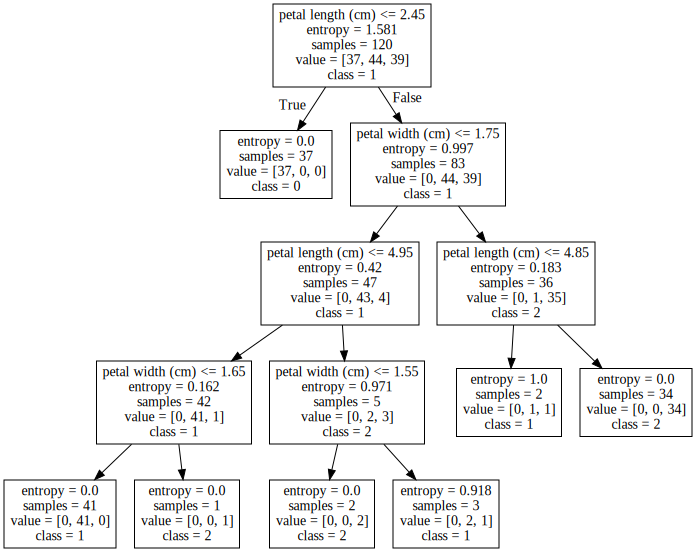

array([[[37., 44., 39.]],

       [[37.,  0.,  0.]],

       [[ 0., 44., 39.]],

       [[ 0., 43.,  4.]],

       [[ 0., 41.,  1.]],

       [[ 0., 41.,  0.]],

       [[ 0.,  0.,  1.]],

       [[ 0.,  2.,  3.]],

       [[ 0.,  0.,  2.]],

       [[ 0.,  2.,  1.]],

       [[ 0.,  1., 35.]],

       [[ 0.,  1.,  1.]],

       [[ 0.,  0., 34.]]])

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris = load_iris()
df1 = pd.DataFrame(iris.data, columns=iris.feature_names)
df2 = pd.DataFrame(iris.target, columns=['cls'])
# iris.target_names
df = pd.concat([df1, df2], axis=1)
df
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=123)
from sklearn.tree import DecisionTreeClassifier
# min_samples_split : 샘플이 몇개 이하면 더이상 분리되지않음 / min_samples_leaf : 리프 노드가 될수 있는 최소한의 샘플 개수 => stopping Rule(정지기준)
# max_depth: 최대 깊이 조절
# max_leaf_nodes : 리프 노드(분기되는 노드)의 최대 개수를 지정
# criterion : 불순도 구하는 방법 gini 와 entropy , default gini 
clf = DecisionTreeClassifier(max_depth=7, min_samples_split=5, criterion='entropy', random_state=1234)
clf.fit(train.iloc[:,:4], train.cls)
preds = clf.predict(test.iloc[:, :4])
preds = clf.predict_proba(test.iloc[:, :4])
# 1 일 확률이 0.5 이상인것 행만 추출 
test.iloc[np.where(preds[:, 1]>=0.5)]

# feature별 중요도
clf.feature_importances_
temp = pd.DataFrame(clf.feature_importances_, index=train.columns[:-1], columns=['importance'])
print(temp)

# 'sepal length (cm)'	칼럼 제외하고 가장 큰값 2개
temp.drop(index=['sepal length (cm)']).importance.nlargest(2).index

# 'sepal length (cm)'	칼럼 제외하고 가장 작은값 2개
temp.drop(index=['sepal length (cm)']).importance.nsmallest(2).index

# 가장 중요도 큰값 구하기
test.columns[:-1][clf.feature_importances_.argmax()]
test.columns[:-1][clf.feature_importances_.argsort()[::-1][0]]

# 그림 찾기
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(clf, out_file='./tree.dot', feature_names=test.columns[:-1], class_names=['0','1','2'])
with open('tree.dot') as f:
  dot_graph = f.read()
  display(graphviz.Source(dot_graph))

# 의사 결정나무를 생성한 뒤 어떤 변수가 tree를 형성하는 첫번쨰 변수인지를 찾기
# 위 graphviz 로 시각화 한 뒤 찾기 => 등호로 구분지은 변수값
# 또는 다음과 같이 구함
test.columns[:-1][clf.tree_.feature[0]]

# clf.tree_.feature 의 음의 값은 leaf node
# internal node 들 다 구하기 => DFS 형식으로 하나씩 증가됨
test.columns[:-1][clf.tree_.feature[np.where(clf.tree_.feature >=0)]]

# 각 노드별 불순도(DFS 순서)
clf.tree_.impurity

# 각 노드별 클래스별 개수
clf.tree_.value

In [3]:
# Decision Tree Regression 회귀
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X, y = load_diabetes(return_X_y=True)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=123)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_x, train_y)
preds = regressor.predict(test_x)

from sklearn.metrics import accuracy_score
# 과적합됨
accuracy_score(test_y, preds)

# 학습시킨 값들의 범위를 벗어난 데이터가 들어오면 예측 못함 ㅠㅠ
x1 = train_x[0] + 10 
x2 = train_x[0] + 100
# 모두 같은값 예측
print(regressor.predict(x1.reshape(1,-1)))
print(regressor.predict(x2.reshape(1,-1)))

[220.]
[220.]
